# Need of Feature Scaling

For all the EDA techniques or ML algorithms where algorithm calculate or work by calculating distance between 2 or more datapoints **feature scaling** is necessary. Also if algorithm is working based on some weights to value then the feature scaling is required.

### Some example where Feature Scaling matters are:-

1. K-means, KNN, Hierarichal clustering -- **Eucledian Distance**
2. Logistic Regression, SVMs, Perceptrons, Neural Networks etc -- **Gradient Distance / Ascent-based optimization**
3. Linear Discriminant Analysis (LDA), Principal Component Analysis (PCA), Kernel Principal Component Analysis -- **Finding direction of maximizing the variance (directions / eigen vectors / principal component are orthogonal)**
4. DL Techniques -- ANN (Global Minima, Gradient), CNN, RNN

**Types of transformations :**
1. Standardization
2. Normalization (Min-Max Scaling)
3. Robust Scaler
4. Guassian Transformation :
  <ol>
    <li> Logrithmic Transformation </li>
    <li> Reciprocal Transformation </li>
    <li> Square Root Transformation </li>
    <li> Exponential Transformation </li>
    <li> Box Cox Transformation </li>
  </ol>

### 1. Standardization (Z-score Normalization)

Standadization means centering the variables at zero. This will scale the number b/w -3.4 to +3.4

z = (x-x_mean) / std

In [3]:
import pandas as pd
from sklearn.datasets import load_boston

C:\Users\haris\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(boston_df)
df_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

### 2. Min-Max Scaling

Values scaled between 0 to 1. Mostly used in DL (CNN)

X' = (X-X_mean)/(X_max - X_min)

In [6]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_scaled = mms.fit_transform(boston_df)
df_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.89737254e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.91300620e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])

### 3. Robust Scaler
It is used to scale the feature to median & quantiles.

IQR = 75th Quantile - 25th Quantile
X_scaled = (X - X_median)/IQR

In [7]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df_scaled = rs.fit_transform(boston_df)
df_scaled

array([[-0.06959315,  1.44      , -0.57164988, ...,  0.26190191,
        -0.63768116,  0.35109718],
       [-0.06375455,  0.        , -0.20294345, ...,  0.26190191,
        -0.22188906,  0.05015674],
       [-0.06376011,  0.        , -0.20294345, ...,  0.06667466,
        -0.73263368,  1.69278997],
       ...,
       [-0.05445006,  0.        ,  0.17350891, ...,  0.26190191,
        -0.57171414,  0.33855799],
       [-0.04086745,  0.        ,  0.17350891, ...,  0.09641444,
        -0.48775612,  0.10031348],
       [-0.05816351,  0.        ,  0.17350891, ...,  0.26190191,
        -0.34782609, -1.1661442 ]])

### 4. Guasian Transformation
Guasian transformation techniques are used to transform the data into normal distribution (bell curved).

Some ML algorithms like **linear & logistic** assumes that the features are normally distributed. It will increase the acuracy and performance

To check if data is normally distributed or not we can use QQ-plot

In [9]:
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt

def plot_data(df, col):
    plt.figure(figsize = (10,6))
    plt.subplot(121)
    df[col].hist()
    plt.subplot(122)
    stat.probplot(df[col], dist='norm', plot=pylab)

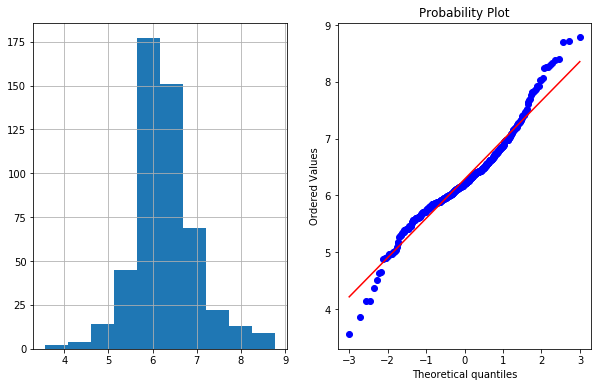

In [14]:
import numpy as np
plot_data(boston_df, 'RM')

#### A. Logrithmic Transformation

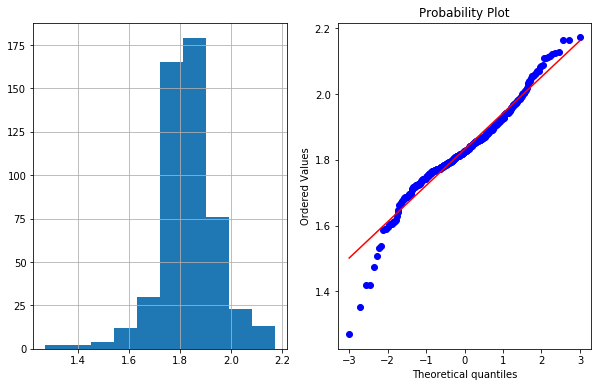

In [15]:
boston_df['RM_log'] = np.log(boston_df['RM'])
plot_data(boston_df, 'RM_log')

#### B. Reciprocal Transformation

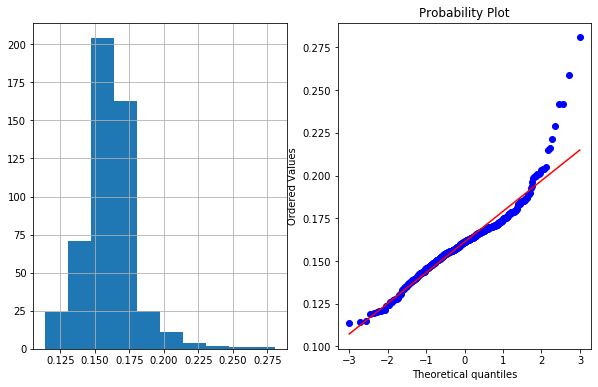

In [13]:
boston_df['RM_reciprocal'] = 1 / boston_df['RM']
plot_data(boston_df, 'RM_reciprocal')

#### C. Square Root Transformation

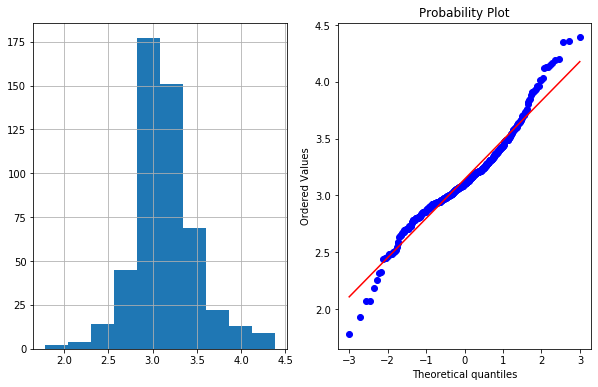

In [17]:
boston_df['RM_square'] = boston_df['RM']**1/2
plot_data(boston_df, 'RM_square')

#### D. Exponential Transformation

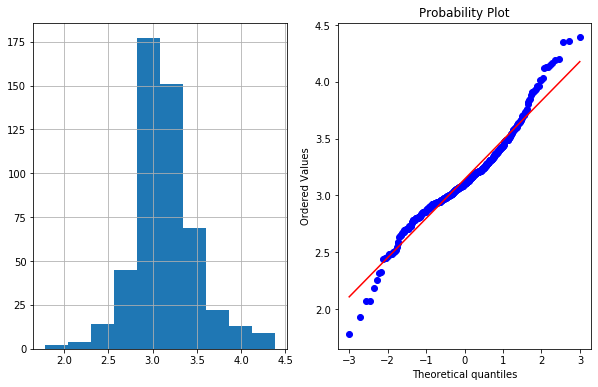

In [18]:
boston_df['RM_exponential'] = boston_df['RM']**1/2
plot_data(boston_df, 'RM_exponential')

In [19]:
#### E. BoxCox Transformation

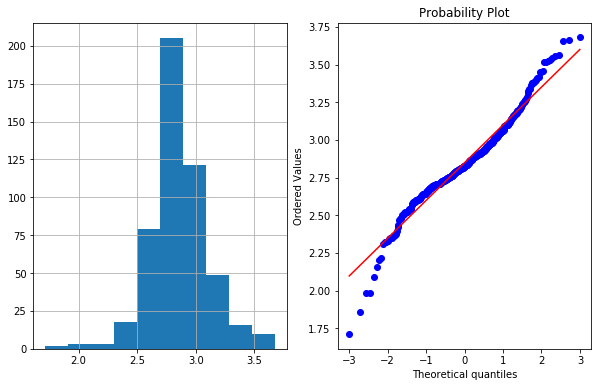

In [20]:
boston_df['RM_boxcox'],params = stat.boxcox(boston_df['RM'])
plot_data(boston_df, 'RM_boxcox')